# Disclaimer
The majority of information of this notebook has been taken from the PyTorch tutorials.

# Multi-Layer Perceptron, MNIST
In this notebook, you will learn how to train a Multi-Layer Perceptron (MLP) on the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of hand-written digit database (MNIST means Modified National Institute for Standards and Technology).

In order to perform the training, we will perform the following steps:
1.   Load and visualize the data
2.   Define a neural network (the model)
3.   Train the model
4.   Evaluate the performance of our trained model on a test dataset (a dataset that has not been seen by the model)



# Import the Necessary Libraries
1. ``torch`` for using PyTorch library
2. ``numpy`` for using the main library for fast numerical computation

In [ ]:
import torch
import numpy as np
import random

In [ ]:
# load google drive to see the files in google drive
# it is possible to mount drive also by the icon over the file
# explorer that you see on the left

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Change the type of runtime
The default device we are running experiments is the cpu.
We can change it and use the GPU.

In [ ]:
if torch.cuda.is_available():
  print('CUDA is available!')

CUDA is available!


In [ ]:
# this is all the necessary code to set the seed
def set_seed(seed : int = 123):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)

In [ ]:
set_seed()

In [ ]:
# MNIST datasets are hosted on yann.lecun.com that has moved under CloudFlare
# protection, so we need to run this cell to download it

from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

# Datasets and Dataloaders
Code for processing data samples can get messy and hard to maintain.
We want that our *dataset code* to be decoupled from our *model training code* for better *readbility* and *modularity*.

PyTorch provides two data primitives: `torch.utils.data.Dataset` and `torch.utils.data.DataLoader` that allow you to use pre-loaded datasets as well as your own data.

`Dataset` stores the samples and their corresponding labels.
`DataLoader` wraps an iterable around the `Dataset` to enable an easy access to the samples.

PyTorch domain libraries provide a number of pre-loaded datasets and provide functions specific to the particular data, such as the ones for [Text Dataset](https://pytorch.org/text/stable/datasets.html) which in the future is the ones of our interest.

In [ ]:

# convert the data to torch.FloatTensor (which is the default data
# type for tensors)
transform = transforms.ToTensor()

# choose the train and test data
# .pt is a common extension to save files of PyTorch
# If the download is already performed, the data will not be downloaded again
# though the @download@ parameter is set to True
train_data = datasets.MNIST(
    '/content/drive/MyDrive/Colab Notebooks/data',
    train=True,
    transform=transform,
    download=True
    )
test_data = datasets.MNIST(
    '/content/drive/MyDrive/Colab Notebooks/data',
    train=False,
    transform=transform,
    download=True
    )

# define how many samples to use for computing the loss and so
# update the parameters
batch_size = 20

In [ ]:
# load the datasets
train_loader = torch.utils.data.DataLoader(
    train_data,
    batch_size=batch_size,
    shuffle=True,
    num_workers=0
    )
test_loader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
    shuffle=False,
    num_workers=0
    )

# We can visualise the number of batches for the training dataset
print('N. of batches of the training dataset: ' + str(len(train_loader)))
# We can visualise the number of batches for the test dataset
print('N. of batches of the test dataset: ' + str(len(test_loader)))

N. of batches of the training dataset: 3000
N. of batches of the test dataset: 500


## Visualize a Batch of Training Data
The first step in classification of data is to take a look at the data, make sure it is loaded correctly, than take any initial consideration about patterns on data. We will see that the batch of data will have the first dimension equal to the number of samples we decided for the batch.

We can see that the images are 4-dimensional tensors (they have 4 axes), indeed:
1. the 1rst dimension: the number of samples per batch
2. the 2nd dimension: the number of channels of the image
3. the 3rd dimension: the height dimension of the image
3. the 4th dimension: the width dimension of the image

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# -- one case to obtain a batch ----
# obtain one batch of training images
iter_train = iter(train_loader)
images, labels = next(iter_train)
print(images.shape)
print(labels.shape)

# -- another case to obtain a batch ---
for i,(images, labels) in enumerate(train_loader):
  break
print(images.shape)
print(labels.shape)

torch.Size([20, 1, 28, 28])
torch.Size([20])
torch.Size([20, 1, 28, 28])
torch.Size([20])


In [ ]:
# --- first element returned by DataLoader ---
print(f'The type images is {type(images)}')

print(f'The type of the data in images is {images.dtype}')
# you can get also the type of the data with the following
print(f'The type of the data in images is {images.type()}')

# --- second element returned by DataLoader ---
print(f'The type labels is {type(labels)}')

print(f'The type of the data in labels is {labels.dtype}')
# you can get also the type of the data with the following
print(f'The type of the data in labels is {labels.type()}')

The type images is <class 'torch.Tensor'>
The type of the data in images is torch.float32
The type of the data in images is torch.FloatTensor
The type labels is <class 'torch.Tensor'>
The type of the data in labels is torch.int64
The type of the data in labels is torch.LongTensor


In order to plot the data we have to transform them in NumPy arrays.

In [ ]:
# as we have seen both images and labels are an instance of the class torch.Tensor
images = images.numpy()
print(np.shape(images))

(20, 1, 28, 28)


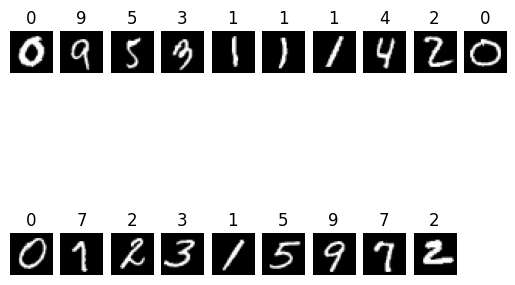

In [ ]:
# create a figure
fig = plt.figure()
# we can decide the number of rows and columns to be used in the plot
nrows = 2
ncols = images.shape[0]//nrows #equivalent len(images)//nrows

# pay attention that the range have to start with index 1
for i in range(1,len(images)):
  # say that we want to add a subplot and in the definition of the
  # subplot we have to say how many rows and columns we have
  # and also the place where we want to put the plot
  sub_plt = fig.add_subplot(nrows, ncols, i)
  # we can remove the axes
  sub_plt.axis('off')
  # np.squeeze() remove from ndarray axes of dimension 1
  squeezed_image = np.squeeze(images[i])
  # we have to show the image, but imshow takes images of 2 dimensions
  # thus we have to throw away all the axes which have dimension 1
  sub_plt.imshow(squeezed_image, cmap='gray')
  # we add also a title to each plot (it is the label)
  sub_plt.set_title(labels[i].item())


## Define the Architecture
The architecture will take in input 784 pixels and as output will give the probabilities for each class.

The goal of an **activation function** is to **scale the outupt of the layers** so that they are a **consistent small value**. As normalizing the input of the network, **this assures that the training will be efficient**.

`torch.nn.functional` is a module which provides useful functions, especially non-linear functions such as ReLU, Sigmoid and SoftMax.

As you can see by the implementation of the network, to input data to a classical ANN, we have to vectorise the input data.

## Pass the network to another device
It is possible to use other devices than the `cpu`, here in CoLab there is the possibility to use a GPU. To do so, we have to pass both the model and the data in the GPU.

On the top right part of CoLab, there is the possibility to see the quantity of resources used.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

  def __init__(self):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(1*28*28,10)

  def forward(self, x):
    # vectorisation of the input data
    x = x.view(-1, 1*28*28)
    x = F.relu(self.fc1(x))
    return x

model = Net()
print(model)

# to check what is the device of the model, we can check the device of the
# parameters defining the model
for i,p in enumerate(model.parameters()):
  print('The used device is: '+ str(p.device))
  break

# pass the model to the GPU
model.to('cuda')
for i,p in enumerate(model.parameters()):
  print('The used device is: ' + str(p.device))
  break

Net(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)
The used device is: cpu
The used device is: cuda:0


In [ ]:
# loss function to utilize
# the CrossEntropyLoss function takes in input logits/scores
# thus, we do not have to convert the scores into probabilities
# it performs both SoftMax and the Negative Log-Lokelihood Loss

criterion = nn.CrossEntropyLoss()

# there are many optimizers, the most classical one is the Stochastic Gradient
# Descent one
# another classical optimizer is the Adam
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=0.9)

## Train the Network
The steps for training a network are:
1. Clean the gradients of all optimized variables
2. Forward pass: compute predicted outputs by passing the input to the model
3. Calculate the loss
4. Backward pass: compute the loss and the gradient w.r.t. the model parameters
5. Perform a single optimization step (parameter update)
6. Update averagre training loss

The following loop does the training for 30 epochs. It is suggested to change that number. However we want to train the model, but not having the model that overfits.

In [ ]:
# number of epochs to train the model
n_epochs = 30  # suggest training between 20-50 epochs

model.train() # prep model for training

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for images, target in train_loader:
        # we pass the data to the GPU
        images = images.to('cuda')
        target = target.to('cuda')
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(images)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        # the loss.item() is returning the average loss over all
        # one batch (so the number of images in a batch)
        # Here we multiply for the number of elements in one batch
        # for then we want to compute the average loss on an epoch
        train_loss += loss.item()*images.size(0)

    # print training statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 0.854725
Epoch: 2 	Training Loss: 0.766664
Epoch: 3 	Training Loss: 0.751454
Epoch: 4 	Training Loss: 0.743571
Epoch: 5 	Training Loss: 0.737949
Epoch: 6 	Training Loss: 0.733728
Epoch: 7 	Training Loss: 0.730815
Epoch: 8 	Training Loss: 0.728152
Epoch: 9 	Training Loss: 0.725989
Epoch: 10 	Training Loss: 0.724358
Epoch: 11 	Training Loss: 0.722274
Epoch: 12 	Training Loss: 0.720705
Epoch: 13 	Training Loss: 0.718743
Epoch: 14 	Training Loss: 0.718321
Epoch: 15 	Training Loss: 0.717216
Epoch: 16 	Training Loss: 0.715676
Epoch: 17 	Training Loss: 0.715104
Epoch: 18 	Training Loss: 0.714367
Epoch: 19 	Training Loss: 0.713512
Epoch: 20 	Training Loss: 0.712605
Epoch: 21 	Training Loss: 0.712254
Epoch: 22 	Training Loss: 0.711083
Epoch: 23 	Training Loss: 0.710247
Epoch: 24 	Training Loss: 0.710024
Epoch: 25 	Training Loss: 0.709095
Epoch: 26 	Training Loss: 0.708228
Epoch: 27 	Training Loss: 0.708447
Epoch: 28 	Training Loss: 0.707991
Epoch: 29 	Training Loss: 0.7

# Test the Trained Network
Finally, we test our best model on previously unseen test data and evaluate its performance.

`model.eval()` will set all the parameters of the model in evaluation mode. For example this affects all the layers which are for dropout, by putting them to off and permitting all the nodes to be on during the testing.

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for images, target in test_loader:
    images = images.to('cuda')
    target = target.to('cuda')
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(images)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item()*images.size(0)
    # convert output probabilities to predicted class

    # It returns the maximum value for each row (dim=1)
    # it is common to use _ to name what we will not use (we do not give a name)

    # values, indices
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    # view_as(other) is for having the tensor which is calling
    # this function on the same dimension of the @other@ passed
    # as parameter
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.731284

Test Accuracy of     0: 97% (960/980)
Test Accuracy of     1:  0% ( 0/1135)
Test Accuracy of     2: 90% (930/1032)
Test Accuracy of     3: 92% (930/1010)
Test Accuracy of     4: 94% (928/982)
Test Accuracy of     5: 84% (757/892)
Test Accuracy of     6: 95% (918/958)
Test Accuracy of     7: 94% (971/1028)
Test Accuracy of     8: 90% (885/974)
Test Accuracy of     9:  0% ( 0/1009)

Test Accuracy (Overall): 72% (7279/10000)


# Visualize Sample Test Result


tensor([11.0028, 14.7830,  0.0000, 13.3551,  5.3444,  0.0000,  7.3485,  0.0000,
         9.8203,  0.0000, 14.2265,  5.0667,  0.0000, 11.9744,  0.0000,  7.6909,
         0.0000, 15.5096,  2.2827,  6.9460], device='cuda:0',
       grad_fn=<MaxBackward0>)
tensor([7, 2, 0, 0, 4, 0, 4, 0, 6, 0, 0, 6, 0, 0, 0, 5, 0, 7, 3, 4],
       device='cuda:0')


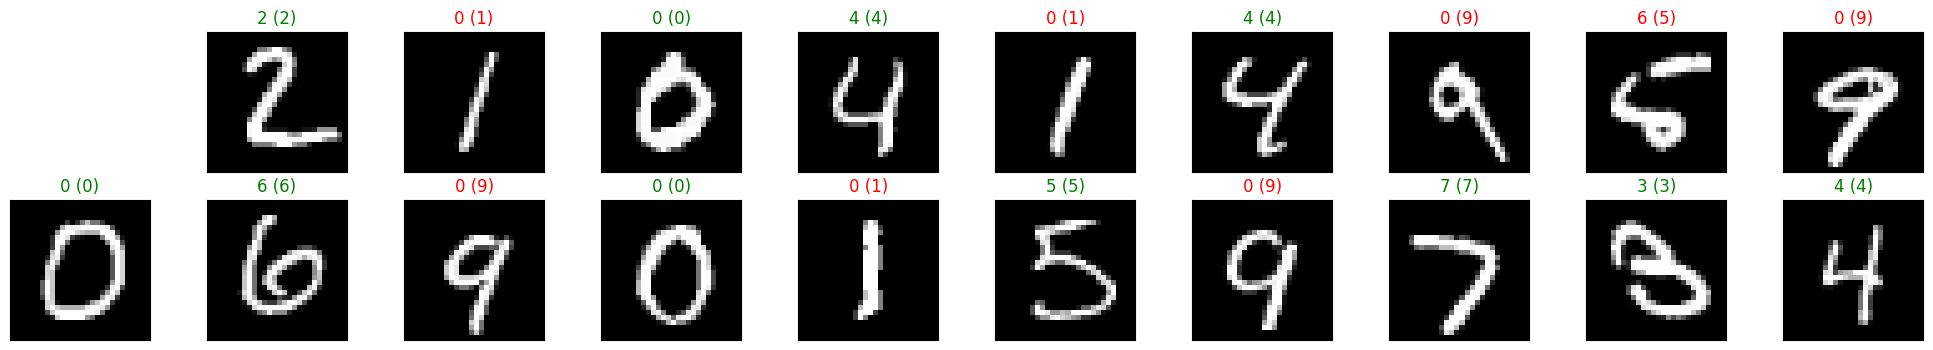

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

images = images.to('cuda')
labels = labels.to('cuda')
# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.cpu().numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(1, 20):
    ax = fig.add_subplot(2, int(20/2), idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))